In [3]:
import math
import random
import lmfit
import numpy as np
import scipy.signal as ss
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

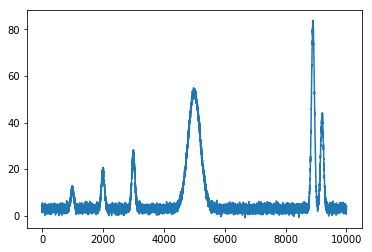

In [4]:
#create test data
nx=10000
def f(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))
gs=[ 
    [25000.0, 5000, 200.0],
    [10000.0, 8900, 50.0],
    [5000.0, 9200, 50.0],
    [1000.0, 1000, 50.0],
    [2000.0, 2000, 50.0],
    [3000.0, 3000, 50.0]
   ]
x = np.arange(nx)
y = sum([f(x, *g) for g in gs]) + np.random.randn(nx) + np.random.rand(1)*10
plt.plot(x,y)

In [5]:
#create model

#find peaks
centers,_=ss.find_peaks(y,distance=50,prominence=20)
print(centers)

#gaussian peaks
models=[lmfit.models.GaussianModel(prefix=f'p{i}_') for i in range(len(centers))]
params=[m.make_params(center=centers[i],sigma=10,amplitude=100) for i,m in enumerate(models)]

#linear background
models.append(lmfit.models.LinearModel(prefix="l_"))
params.append(models[-1].make_params(slope=0))

#combine
model = reduce((lambda x, y: x + y), models)
param=params[0]
for p in params[1:]: param.update(p)

[1998 3005 4978 8907 9214]


In [6]:
print('initial params:')
param

initial params:


name,value,initial value,min,max,vary,expression
p0_sigma,10.0000000,None,0.00000000,inf,True,
p0_center,1998.00000,None,-inf,inf,True,
p0_amplitude,100.000000,None,-inf,inf,True,
p0_fwhm,23.5482000,None,-inf,inf,False,2.3548200*p0_sigma
p0_height,3.98942300,None,-inf,inf,False,"0.3989423*p0_amplitude/max(1.e-15, p0_sigma)"
p1_sigma,10.0000000,None,0.00000000,inf,True,
p1_center,3005.00000,None,-inf,inf,True,
p1_amplitude,100.000000,None,-inf,inf,True,
p1_fwhm,23.5482000,None,-inf,inf,False,2.3548200*p1_sigma
p1_height,3.98942300,None,-inf,inf,False,"0.3989423*p1_amplitude/max(1.e-15, p1_sigma)"


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

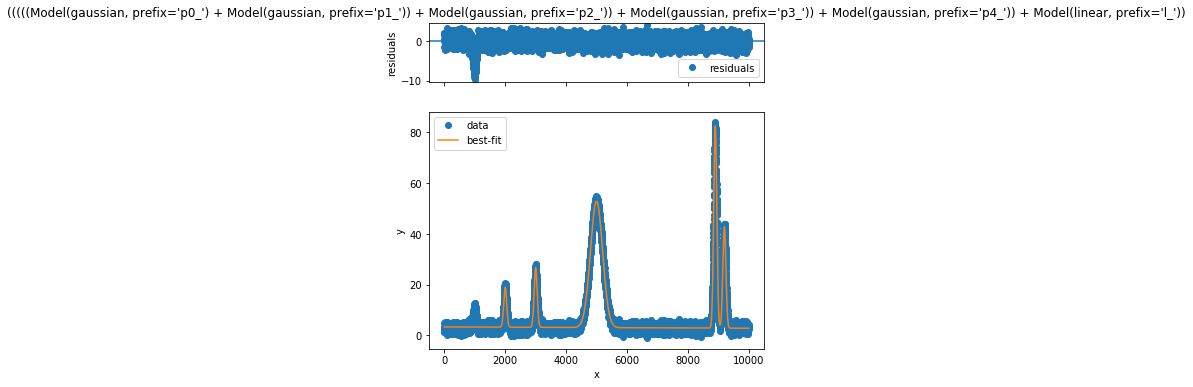

In [7]:
#fit
output = model.fit(y, param, x=x)
output.plot()

In [8]:
print('found peaks:')
[int(np.rint(v.value)) for k,v in output.params.items() if 'center' in k]

found peaks:


[2000, 3000, 5000, 8900, 9200]

In [9]:
print('full results:')
output

full results:
